In [21]:
import pandas as pd

# Convert to DataFrame
df = pd.read_csv('RoomMatesDataSet.csv')
 
# Visual Representation of DataFrame
df

,ID,Name,Age,Gender,Native Language,Interests,Cleanliness Level,Sleeping Level,Smoking,Drinking,Cooking Level,Introvert Level,Extrovert Level,Interest In Music,Interest In Dance,Interest In Physical Activities,Exercise Habits,Interest in Gaming,IsWorking
0,1,Jatin Nair,20,Female,English,Music,5,1,0,1,1,5,4,4,2,3,1,5,1
1,2,Xena Pandey,35,Male,Spanish,Sports,3,5,1,0,5,5,2,3,1,4,5,2,1
2,3,Deepak Yadav,16,Male,Hindi,Cooking,4,5,1,0,5,1,5,2,2,1,5,4,1
3,4,Aakash Chopra,35,Female,Spanish,Cooking,5,1,1,0,1,1,1,1,3,5,5,4,0
4,5,Tina Gupta,34,Male,English,Traveling,2,5,0,0,3,2,2,3,2,3,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,Hari,49,Female,Russian,Music,5,5,0,1,4,3,2,1,5,3,5,2,1
496,497,Bittu,22,Female,German,Nature,5,4,0,1,5,3,3,5,5,3,1,3,0
497,498,Tina,17,Male,Hindi,Music,2,3,0,0,3,4,4,5,4,1,2,5,0
498,499,Manoj,36,Male,German,Nature,3,1,0,1,3,2,5,1,3,3,5,3,0


# Test Dataset 

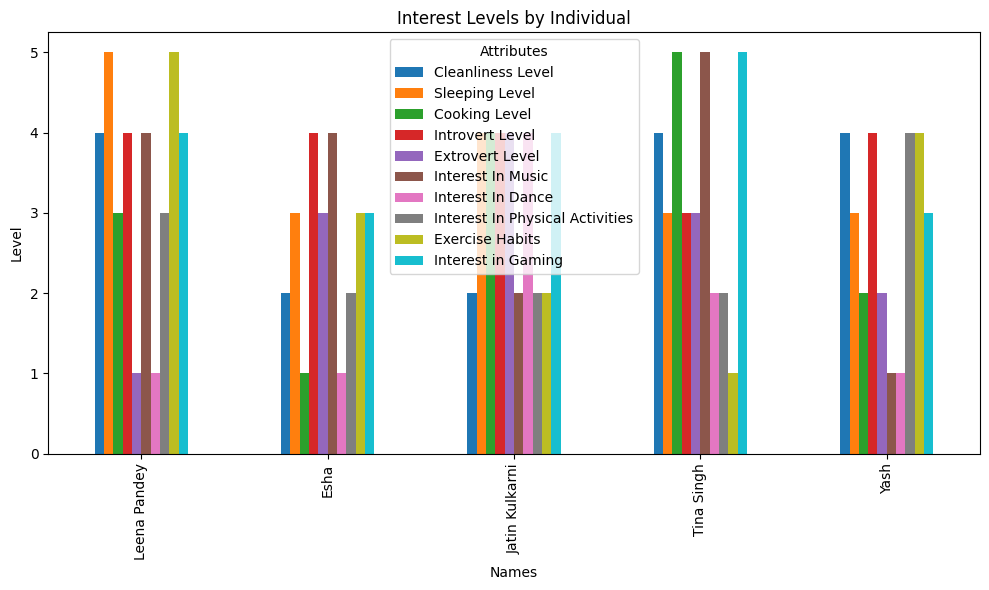

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


attributes = [
    "Cleanliness Level", "Sleeping Level", "Cooking Level",
    "Introvert Level", "Extrovert Level", "Interest In Music",
    "Interest In Dance", "Interest In Physical Activities",
    "Exercise Habits", "Interest in Gaming"
]

# Create a bar plot for each individual
fig, ax = plt.subplots(figsize=(10, 6))
df.sample(n=5).set_index('Name')[attributes].plot(kind='bar', ax=ax)
plt.title('Interest Levels by Individual')
plt.ylabel('Level')
plt.xlabel('Names')
plt.xticks(rotation=90)
plt.legend(title='Attributes')
plt.tight_layout()
plt.show()

In [23]:
# Define preprocessing steps
categorical_features = ['Gender',
                        'Native Language',
                        'Interests']
numeric_features = ['Cleanliness Level',
                    'Sleeping Level',
                    'Smoking',
                    'Drinking',
                    'Cooking Level',
                    'Introvert Level',
                    'Extrovert Level',
                    'Interest In Music',
                    'Interest In Dance',
                    'Interest In Physical Activities',
                    'Exercise Habits',
                    'Interest in Gaming',
                    'IsWorking'
                   ]


In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

# ('num', StandardScaler(), numeric_features): 
# This transformer is for numeric features. The StandardScaler standardizes these features by removing the mean and scaling to unit variance.
# ('cat', OneHotEncoder(), categorical_features): 
# This transformer is for categorical features. The OneHotEncoder converts categorical variables into a format that can be provided to ML algorithms, typically creating binary columns for each category.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

In [25]:
from sklearn.pipeline import make_pipeline, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

X = preprocessor.fit_transform(df)


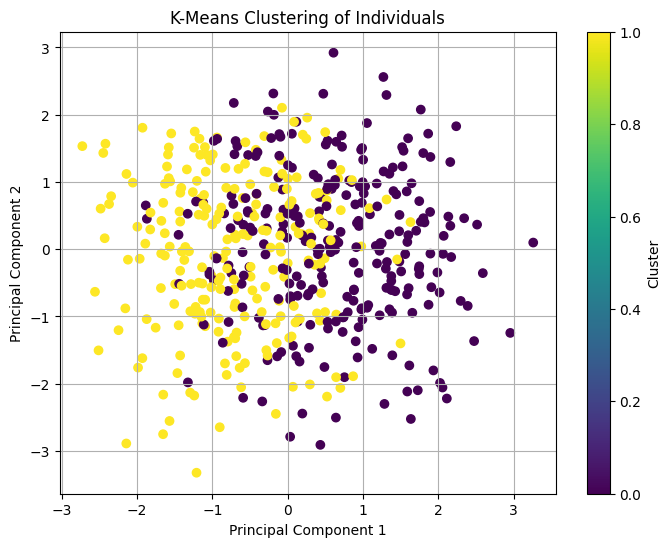

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the number of clusters (e.g., 2 for simplicity)
num_clusters = 2

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters (if you reduce dimensions)
# For visualization, you might want to use PCA to reduce dimensions
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering of Individuals')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid()

# Show plot
plt.show()


In [27]:

from sklearn.pipeline import Pipeline
# Create pipeline for KMeans clustering
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=num_clusters, random_state=42))  # Adjust the number of clusters as needed
])

# Fit the model
pipeline.fit(df)

# Get cluster labels
df['Cluster'] = pipeline.predict(df)

print(df[['Name', 'Cluster']])


              Name  Cluster
0       Jatin Nair        0
1      Xena Pandey        1
2     Deepak Yadav        1
3    Aakash Chopra        1
4       Tina Gupta        0
..             ...      ...
495           Hari        0
496          Bittu        0
497           Tina        0
498          Manoj        0
499          Leena        1

[500 rows x 2 columns]


# Cosine Similarity Matrix:

In [28]:

X = preprocessor.fit_transform(df)
from sklearn.metrics.pairwise import cosine_similarity

# Compute pairwise similarity
similarity_matrix = cosine_similarity(X)

# Convert similarity to percentage
match_percentages = similarity_matrix * 100

# Create a DataFrame for easy viewing
match_percentages_df = pd.DataFrame(match_percentages, index=df['Name'], columns=df['Name'])
print(match_percentages_df)


Name           Jatin Nair  Xena Pandey  Deepak Yadav  Aakash Chopra   
Name                                                                  
Jatin Nair     100.000000   -32.856231    -32.093846      -3.791034  \
Xena Pandey    -32.856231   100.000000     33.679924      -3.408653   
Deepak Yadav   -32.093846    33.679924    100.000000      -0.076370   
Aakash Chopra   -3.791034    -3.408653     -0.076370     100.000000   
Tina Gupta     -48.846669    34.065988     16.502264       5.529662   
...                   ...          ...           ...            ...   
Hari            -9.633890    16.225161     17.813391       7.242917   
Bittu           16.706773   -24.564554    -17.508561     -26.946497   
Tina            23.997597   -23.246870      5.167827     -33.373422   
Manoj            2.011533   -25.728652     11.839623      22.977109   
Leena          -17.244605    19.848218     53.343958      13.312356   

Name           Tina Gupta  Manoj Kapoor  Tina Verma  Esha Dutta   
Name     

## User Preferences Data Collection

In [50]:
## Function to collect user preferences


def collect_preferences():
    valid_genders = ["Male", "Female"]
    valid_languages = [
        "English", "Spanish", "Hindi", "Mandarin", 
        "Japanese", "Russian", "German", "French"
    ]
    valid_interests = [
        "Music", "Sports", "Cooking", "Traveling", 
        "Gaming", "Technology", "Reading", "Nature", "Art"
    ]

    def get_valid_input(prompt, valid_options):
        while True:
            response = input(prompt).strip()
            if response in valid_options:
                return response
            else:
                print(f"Invalid input. Please choose from: {', '.join(valid_options)}.")

    def get_valid_int(prompt, min_value, max_value):
        while True:
            try:
                value = int(input(prompt))
                if min_value <= value <= max_value:
                    return value
                else:
                    print(f"Please enter a number between {min_value} and {max_value}.")
            except ValueError:
                print("Invalid input. Please enter a valid number.")

    new_preference = {
        "ID": 1000,
        "Name": input("Enter your name: "),
        "Age": get_valid_int("Enter your age: ", 0, 120),  # Assuming age should be between 0 and 120
        "Gender": get_valid_input("Enter your gender (Male/Female): ", valid_genders),
        "Native Language": get_valid_input("Enter your native language: ", valid_languages),
        "Interests": get_valid_input("Enter your interests (Music/Sports/Cooking/Traveling/Gaming/Technology/Reading/Nature/Art): ", valid_interests),
        "Cleanliness Level": get_valid_int("Rate your cleanliness level (1-5): ", 1, 5),
        "Sleeping Level": get_valid_int("Rate your sleeping level (1-5): ", 1, 5),
        "Smoking": get_valid_int("Do you smoke? (0 for No, 1 for Yes): ", 0, 1),
        "Drinking": get_valid_int("Do you drink alcohol? (0 for No, 1 for Yes): ", 0, 1),
        "Cooking Level": get_valid_int("Rate your cooking level (1-5): ", 1, 5),
        "Introvert Level": get_valid_int("Rate your introvert level (1-5): ", 1, 5),
        "Extrovert Level": get_valid_int("Rate your extrovert level (1-5): ", 1, 5),
        "Interest In Music": get_valid_int("Rate your interest in music (1-5): ", 1, 5),
        "Interest In Dance": get_valid_int("Rate your interest in dance (1-5): ", 1, 5),
        "Interest In Physical Activities": get_valid_int("Rate your interest in physical activities (1-5): ", 1, 5),
        "Exercise Habits": get_valid_int("Rate your exercise habits (1-5): ", 1, 5),
        "Interest in Gaming": get_valid_int("Rate your interest in gaming (1-5): ", 1, 5),
        "IsWorking": get_valid_int("Are you currently working? (0 for No, 1 for Yes): ", 0, 1)
    }

    return new_preference



# Collect preferences from the user
user_preferences = collect_preferences()
print(user_preferences)

# Print the collected preferences
print("\nCollected Preferences:")
for key, value in user_preferences.items():
    print(f"{key}: {value}")


Enter your name: sanjay
Enter your age: 21
Enter your gender (Male/Female): Male
Enter your native language: English
Enter your interests (Music/Sports/Cooking/Traveling/Gaming/Technology/Reading/Nature/Art): Sports
Rate your cleanliness level (1-5): 2
Rate your sleeping level (1-5): 3
Do you smoke? (0 for No, 1 for Yes): 0
Do you drink alcohol? (0 for No, 1 for Yes): 
Invalid input. Please enter a valid number.
Do you drink alcohol? (0 for No, 1 for Yes): 0
Rate your cooking level (1-5): 1
Rate your introvert level (1-5): 1
Rate your extrovert level (1-5): 5
Rate your interest in music (1-5): 5
Rate your interest in dance (1-5): 5
Rate your interest in physical activities (1-5): 5
Rate your exercise habits (1-5): 1
Rate your interest in gaming (1-5): 5
Are you currently working? (0 for No, 1 for Yes): 0
{'ID': 1000, 'Name': 'sanjay', 'Age': 21, 'Gender': 'Male', 'Native Language': 'English', 'Interests': 'Sports', 'Cleanliness Level': 2, 'Sleeping Level': 3, 'Smoking': 0, 'Drinking': 

## Predicting Maching Profiles

In [53]:
# Convert new preference to DataFrame
new_preference_df = pd.DataFrame([user_preferences])

# Apply preprocessing
new_preference_processed = preprocessor.transform(new_preference_df)

# Predict cluster for new preference
predicted_cluster = kmeans.predict(new_preference_processed)[0]

# Find users in the same cluster
matching_users = df[df['Cluster'] == predicted_cluster]
print("Matching users:")
matching_users[["Name"]]


Matching users:


,Name
1,Xena Pandey
2,Deepak Yadav
3,Aakash Chopra
9,Qasim Iyer
13,Farhan Yadav
...,...
490,Isha
491,Simran
493,Simran
494,Wahid


In [54]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_individual_match_percentage(new_preference, df, preprocessor):
    # Preprocess new preference object
    new_preference_df = pd.DataFrame([new_preference])
    new_preference_processed = preprocessor.transform(new_preference_df)
    
    # Preprocess existing user profiles
    existing_profiles_processed = preprocessor.transform(df)
    
    # Calculate similarity
    similarities = cosine_similarity(new_preference_processed, existing_profiles_processed)
    
    # Convert similarity to percentage
    match_percentages = similarities[0] * 100
    
    # Create a DataFrame with match percentages
    result = pd.DataFrame({
        'Name': df['Name'],
        'Match Percentage': match_percentages
    })
    
    return result



# Calculate and print match percentages
match_percentages_df = calculate_individual_match_percentage(user_preferences, df, preprocessor)
match_percentages_df


,Name,Match Percentage
0,Jatin Nair,21.491913
1,Xena Pandey,-39.605463
2,Deepak Yadav,-16.727492
3,Aakash Chopra,4.782703
4,Tina Gupta,4.410135
...,...,...
495,Hari,-36.184401
496,Bittu,21.129854
497,Tina,48.184656
498,Manoj,7.824153


In [55]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

def highlight_scores(s):
    return [
     'background-color: green' if v > 60 else
        'background-color: lightblue' if 20 <= v <= 60 else
        'background-color: red' if v < 20 else
        ''
        for v in s
    ]

sorted_df = match_percentages_df.sort_values(by='Match Percentage', ascending=False)
sorted_df['Percentage'] = sorted_df['Match Percentage'].astype(str) + '%'

styled_df = sorted_df.style.apply(highlight_scores, subset=['Match Percentage'])
styled_df


,Name,Match Percentage,Percentage
108,Isha Dutta,66.499862,66.4998624939694%
248,Esha Iyer,60.185569,60.18556943674329%
47,Tina Khan,57.685630,57.68563040458058%
403,Aakash,57.417003,57.417002803592666%
462,Tina,54.222880,54.22287979813323%
419,Neha,53.517436,53.517436405522%
249,Tina Sinha,53.414261,53.41426078366609%
273,Neha,53.318850,53.31885022515649%
84,Wahid Rao,52.820797,52.82079681398818%
22,Om Khan,52.746039,52.74603880531923%


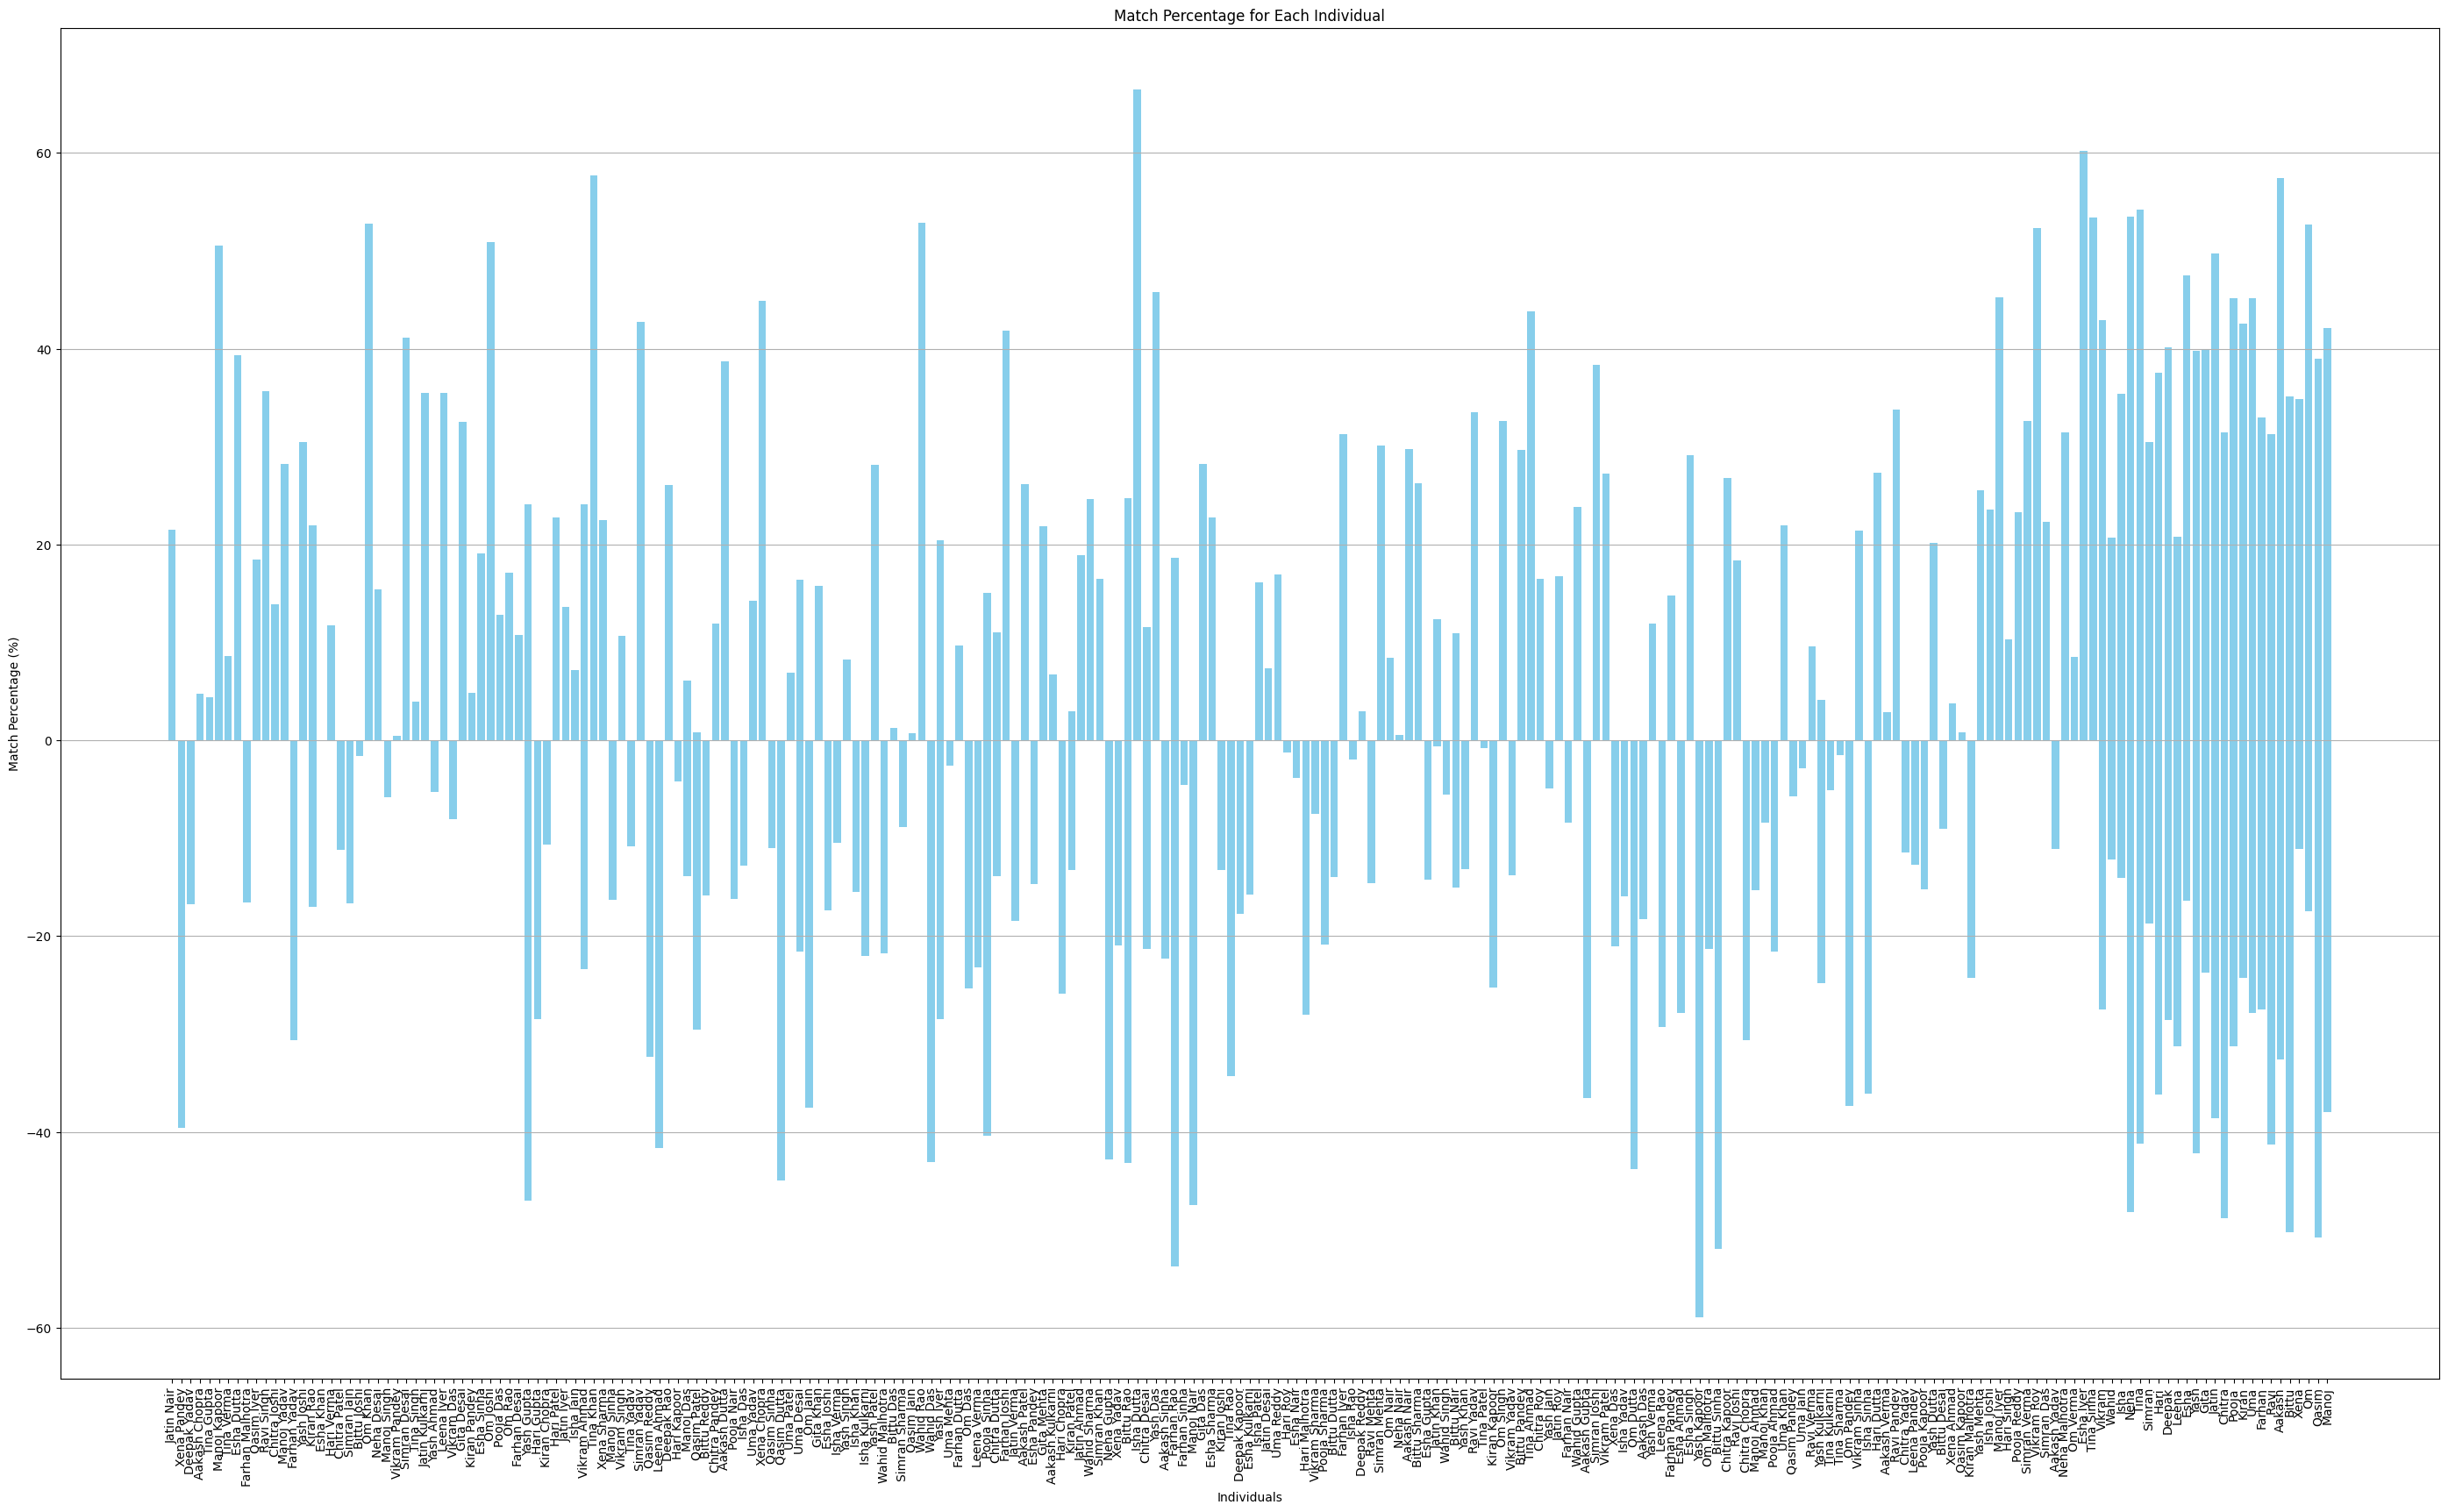

In [56]:
import matplotlib.pyplot as plt

# Bar chart for match percentages
plt.figure(figsize=(35, 20))
plt.bar(match_percentages_df['Name'], match_percentages_df['Match Percentage'], color='skyblue')
plt.title('Match Percentage for Each Individual')
plt.xlabel('Individuals')
plt.ylabel('Match Percentage (%)')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Show plot
plt.show()


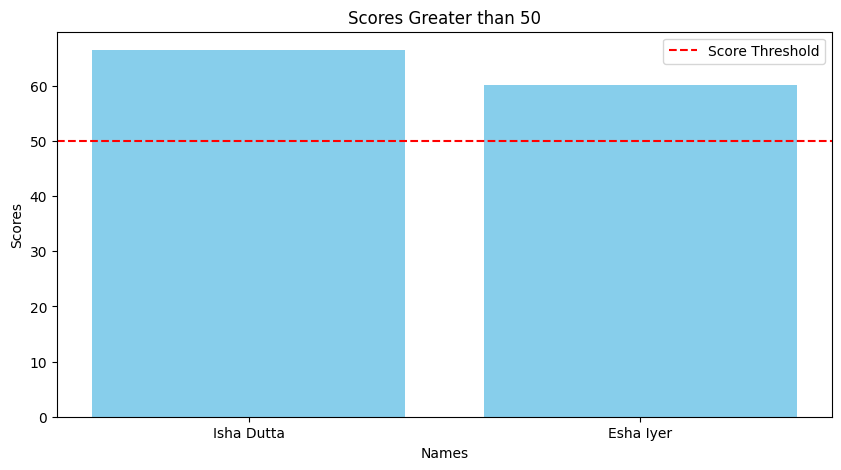

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Filter the DataFrame
filtered_df = match_percentages_df[match_percentages_df['Match Percentage'] > 60]

# Plot using Matplotlib
plt.figure(figsize=(10, 5))
plt.bar(filtered_df['Name'], filtered_df['Match Percentage'], color='skyblue')
plt.title('Scores Greater than 50')
plt.xlabel('Names')
plt.ylabel('Scores')
plt.axhline(50, color='red', linestyle='--', label='Score Threshold')
plt.legend()
plt.show()

# Alternatively, use Seaborn
# plt.figure(figsize=(10, 5))
# sns.barplot(x='name', y='score', data=filtered_df, palette='Blues')
# plt.title('Scores Greater than 50')
# plt.axhline(50, color='red', linestyle='--', label='Score Threshold')
# plt.legend()
# plt.show()
